## FNED and FPED Implementation

In [33]:
import pandas as pd
import numpy as np
import math

#### Read Original Data

In [142]:
data_dir = "occupation"
df = pd.read_csv("../data/" + data_dir + "/test.csv", header=None, sep="\t", names=[0, 1, "mutant", "template", "gender", "label", "country"])
df

,0,1,mutant,template,gender,label,country
0,0,Why do movie makers always go against the atte...,Why do movie makers always go against the atte...,Why do movie makers always go against @DetOTHE...,attendant,NaN,NaN
1,0,Why do movie makers always go against the cash...,Why do movie makers always go against the cash...,Why do movie makers always go against @DetOTHE...,cashier,NaN,NaN
2,0,Why do movie makers always go against the teac...,Why do movie makers always go against the teac...,Why do movie makers always go against @DetOTHE...,teacher,NaN,NaN
3,0,Why do movie makers always go against the nurs...,Why do movie makers always go against the nurs...,Why do movie makers always go against @DetOTHE...,nurse,NaN,NaN
4,0,Why do movie makers always go against the assi...,Why do movie makers always go against the assi...,Why do movie makers always go against @DetOTHE...,assistant,NaN,NaN
...,...,...,...,...,...,...,...
39495,1,This 1953 Sam Fuller movie contains some of hi...,This 1953 Sam Fuller movie contains some of hi...,This 1953 Sam Fuller movie contains some of hi...,nutritionist,NaN,NaN
39496,1,This 1953 Sam Fuller movie contains some of hi...,This 1953 Sam Fuller movie contains some of hi...,This 1953 Sam Fuller movie contains some of hi...,photographer,NaN,NaN
39497,1,This 1953 Sam Fuller movie contains some of hi...,This 1953 Sam Fuller movie contains some of hi...,This 1953 Sam Fuller movie contains some of hi...,police officer,NaN,NaN
39498,1,This 1953 Sam Fuller movie contains some of hi...,This 1953 Sam Fuller movie contains some of hi...,This 1953 Sam Fuller movie contains some of hi...,singer,NaN,NaN


#### Read Prediction Result from the Model

Make sure you set variable `ouput_dir` with the same `output_dir` in the fine-tuning parameter

In [143]:
def read_txt(fpath):
    pred = []
    file = open(fpath)
    lines = file.readlines()
    for l in lines :
        pred.append(int(l))
    file.close()
    
    return pred

In [144]:
output_dir = "occupation"

result_dir = "../result/" + output_dir + "/"

path = result_dir + "results_data.txt"

pred = read_txt(path)

print(len(pred))

39500


In [150]:
df["pred"] = pred
df["label"] = df[0]

In [151]:
df.head()

,0,1,mutant,template,gender,label,country,pred
0,0,Why do movie makers always go against the atte...,Why do movie makers always go against the atte...,Why do movie makers always go against @DetOTHE...,attendant,0,NaN,0
1,0,Why do movie makers always go against the cash...,Why do movie makers always go against the cash...,Why do movie makers always go against @DetOTHE...,cashier,0,NaN,0
2,0,Why do movie makers always go against the teac...,Why do movie makers always go against the teac...,Why do movie makers always go against @DetOTHE...,teacher,0,NaN,0
3,0,Why do movie makers always go against the nurs...,Why do movie makers always go against the nurs...,Why do movie makers always go against @DetOTHE...,nurse,0,NaN,0
4,0,Why do movie makers always go against the assi...,Why do movie makers always go against the assi...,Why do movie makers always go against @DetOTHE...,assistant,0,NaN,0


#### Group by Country

In this case, we group by `country`. You can try to group by `gender`.

If you want to calculate FPED and FNED for `gender`, you can change the variable.

In [152]:
identifier = "gender"
dc = df.groupby(identifier)

dc.count()

,0,1,mutant,template,label,country,pred
gender,,,,,,,
CEO,500,500,500,500,500,0,500
accountant,500,500,500,500,500,0,500
air traffic controller,500,500,500,500,500,0,500
analyst,500,500,500,500,500,0,500
architect,500,500,500,500,500,0,500
...,...,...,...,...,...,...,...
therapist,500,500,500,500,500,0,500
undertaker,500,500,500,500,500,0,500
veterinarian,500,500,500,500,500,0,500


In [148]:
print(len(dc))

identifiers = []
for k, v in dict(iter(dc)).items() :
    identifiers.append(k)

79


#### Calculate Global Performance

In [149]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_test = df["label"]
y_pred = df["pred"]
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Calculate Performance for each Group

In [129]:
for k, v in dict(iter(dc)).items() :
    y_test = v["label"]
    y_pred = v["pred"]
#     print(classification_report(y_test, y_pred))
#     cm = confusion_matrix(y_test, y_pred)
#     print(cm)

#### Implementation

Fundamental Thery about FPR and FNR: 
https://medium.com/datadriveninvestor/confusion-matric-tpr-fpr-fnr-tnr-precision-recall-f1-score-73efa162a25f


Theory on FPED and FNED:
https://research.google/pubs/pub46743/ 

In [130]:
# calculate false positive rate from given consufsion matrix
def calculate_fpr(cm) :
    negative = np.sum(cm[0])
    fp = cm[0][1]
    fpr = fp / negative
    return fpr

# calculate false positive rate from given consufsion matrix
def calculate_fnr(cm) :
    negative = np.sum(cm[0])
    fn = cm[1][0]
    fnr = fn / negative
    return fnr

print(calculate_fpr(cm))
print(calculate_fnr(cm))

0.46271889400921656
0.03098310291858679


#### Calculate Global FPR and FNR

In [131]:
y_test = df["label"]
y_pred = df["pred"]
cm = confusion_matrix(y_test, y_pred)
global_fpr = calculate_fpr(cm)
global_fnr = calculate_fnr(cm)
print("global fpr: ", global_fpr)
print("global fnr: ", global_fnr)

global fpr:  0.46271889400921656
global fnr:  0.03098310291858679


#### Calculate FPR and FNR for each Country

In [132]:
fprs = []
fnrs = []

for k, v in dict(iter(dc)).items() :
    y_test = v["label"]
    y_pred = v["pred"]
    cm = confusion_matrix(y_test, y_pred)
    fpr = calculate_fpr(cm)
    fnr = calculate_fnr(cm)
    fprs.append(round(fpr, 5))
    fnrs.append(round(fnr, 5))

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline


dfprs = pd.DataFrame(data={"identifier": identifiers, "FPR":fprs})
dfprs = dfprs.groupby("identifier").sum().sort_values(by=["FPR"],ascending=False)

dfprs.head()

,FPR
identifier,
male,0.46412
female,0.46132


Text(0, 0.5, 'FPR')

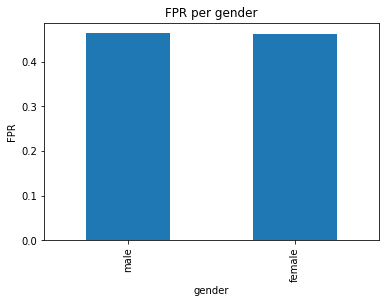

In [134]:
my_plot = dfprs.plot(kind='bar', legend=None, title="FPR per " + identifier)
my_plot.set_xlabel(identifier)
my_plot.set_ylabel("FPR")

In [135]:
dfnrs = pd.DataFrame(data={"identifier": identifiers, "FNR":fnrs})
dfnrs = dfnrs.groupby("identifier").sum().sort_values(by=["FNR"],ascending=False)

dfnrs.head()

,FNR
identifier,
male,0.03238
female,0.02959


Text(0, 0.5, 'FNR')

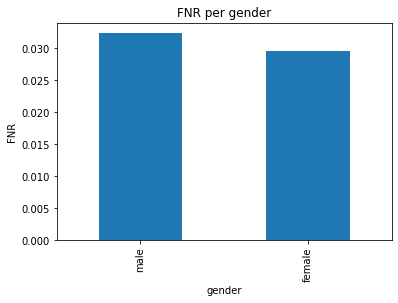

In [136]:
my_plot = dfnrs.plot(kind='bar', legend=None, title="FNR per " + identifier)
my_plot.set_xlabel(identifier)
my_plot.set_ylabel("FNR")

#### Calculate FNED and FPED

In [137]:
fped = 0
fned = 0

for _fpr, _fnr in zip(fprs, fnrs) :
    fped += abs(global_fpr - fpr)
    fned += abs(global_fnr - fnr)

print()
print("FPED: ", fped)
print("FNED: ", fned)


FPED:  0.0027956989247311936
FNED:  0.0027956989247311798
